# Final limits for EXO-19-009

Do this only the first time

In [ ]:
#!pip install --user --upgrade tables
#!pip install --user --upgrade seaborn

## Import the summary of the statistical analysis

## Do some summary plots

In [6]:
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import ROOT
import numpy as np
import pandas as pd
import scipy.ndimage.filters as filters
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

_color_95=ROOT.gROOT.GetColor(ROOT.kOrange).AsHexString()
_color_68=ROOT.gROOT.GetColor(ROOT.kGreen+1).AsHexString()

#_outDir='/eos/user/p/psilva/www/EXO-19-009/stat/{}'.format(datetime.datetime.now().strftime('%Y%b%d'))
_outDir='/eos/user/p/psilva/www/EXO-19-009/paper_fr'
os.system('mkdir -p ' + _outDir)

#read individual results to compare
dflist=[]
for f,tag in [('/eos/user/p/psilva/data/ppszx/limits_18May2021/summary_exp_analysis_1exc.h5',      'exc'),
              ('/eos/user/p/psilva/data/ppszx/limits_18May2021/summary_obs_analysis_1exc.h5',      'excobs'),             
             ]:
    dflist.append( pd.read_hdf(f,key='scan') )
    dflist[-1]['ana']=dflist[-1]['ana']+'_'+tag

#unblinding
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_1May2021/summary_exp_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_expunb'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_1May2021/summary_obs_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_obsunb'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_28Jun2021/summary.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_obsunbv2'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_7Sep2021/summary_exp_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_expfix'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_7Sep2021/summary_obs_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_obsunbfix'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_6Jan2022/summary_exp_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_expfinal'
dflist.append(  pd.read_hdf('/eos/user/p/psilva/data/ppszx/limits_6Jan2022/summary_obs_analysis_1exc.h5',key='scan') )
dflist[-1]['ana']=dflist[-1]['ana']+'_obsunbfinal'

#merge the different results
df = pd.concat(dflist)
df.sort_values('mass',inplace=True)


#luminosity corrections ... the cards were generated with 37.5/fb before 22/02/2021
deflumi=37500.
zlumi=37193.
glumi=2288.

#ad-hoc scalings with luminosity
#for c in ['r95','drup68','drdn68','drup95','drdn95','r95obs']:
#    df[c]=np.where(df['channel']=='g',df[c]*deflumi/glumi,df[c]*deflumi/zlumi)
#for c in ['sig']:
#    df[c]=np.where(df['channel']=='g',df[c]/np.sqrt(deflumi/glumi),df[c]/np.sqrt(deflumi/zlumi))
#    df['pval']=df[c].apply(ROOT.Math.normal_cdf_c)

#sig_scale=20
#df['sig']=np.where(df['channel']=='g',df['sig']*sig_scale,df['sig'])
#df['pval']=df['sig'].apply(ROOT.Math.normal_cdf_c)

print('Available channels:',df['channel'].unique())
#print('Available analysis:',df['ana'].unique())
df.head()


chTitle={'g':r'$pp\rightarrow pp\gamma X$',
         'z':r'$pp\rightarrow ppZX$',
         'zmm':r'$pp\rightarrow ppZ(\mu\mu)X$',
         'zee':r'$pp\rightarrow ppZ(ee)X$'}
anaTitle={'inc_exc':'combined',
          'inc_nch_exc':'combined (nch)',
          'inc_nvtx_exc':'combined (vtx)',
          'inc_xangle_exc':'combined (xangle)',
          'inc_xangle_jveto_exc':'combined (jet veto+xangle)',
          'inc_jveto_exc':'combined (jet veto)',
          'inc_xangle_nvtx_exc':'uncorrelated',
          'inc_xangle_nvtx_part_corr_exc':'part. correlated',
          'inc_xangle_nvtx_corr_exc':'fully correlated',
          'pcat1_exc':'multi-multi',
          'pcat1_nvtx_exc':'multi-multi (vtx)',
          'pcat1_xangle_exc':'multi-multi (xangle)',
          'pcat1_xangle_nvtx_exc':'multi-multi (vtx+xangle)',
          'pcat1_nchloose_exc':'multi-multi (nch)',
          'pcat1_jveto_exc':'multi-multi (jet veto)',
          'pcat2_exc':'multi-single',
          'pcat2_nvtx_exc':'multi-single (vtx)',
          'pcat2_xangle_exc':'multi-single (xangle)',
          'pcat2_xangle_nvtx_exc':'multi-single (vtx+xangle)',
          'pcat3_exc':'single-multi',
          'pcat3_nvtx_exc':'single-multi (vtx)',
          'pcat3_xangle_exc':'single-multi (xangle)',
          'pcat3_xangle_nvtx_exc':'single-multi (vtx+xangle)',
          'pcat4_exc':'single-single',
          'pcat4_nvtx_exc':'single-single (vtx)',
          'pcat4_xangle_exc':'single-single (xangle)',
          'pcat4_xangle_nvtx_exc':'single-single (vtx+xangle)',}

anaKeys=list(anaTitle.keys())
for key in anaKeys:
    anaTitle[key.replace('_exc','_inc')]=anaTitle[key]+'(=1,2 px)'
    anaTitle[key.replace('_exc','_excobs')]=anaTitle[key]+' observed'
    anaTitle[key.replace('_exc','_excexpm1000')]=anaTitle[key]+' ($m_{X}$=1 TeV)'
    anaTitle[key.replace('_exc','_Dec2020')]=anaTitle[key]+' Dec20'
    anaTitle[key.replace('_exc','_preapp')]=anaTitle[key]+' (pre-app)'
    anaTitle[key.replace('_exc','_expunb')]=anaTitle[key]+' (1/05/2021)'
    anaTitle[key.replace('_exc','_obsunb')]=anaTitle[key]+' (1/05/2021)'
    anaTitle[key.replace('_exc','_obsunbv2')]=anaTitle[key]+' (1/05/2021) v2'
    anaTitle[key.replace('_exc','_expfix')]=anaTitle[key]+' (07/09/2021)'
    anaTitle[key.replace('_exc','_obsunbfix')]=anaTitle[key]+' (07/09/2021)'
    anaTitle[key.replace('_exc','_expfinal')]=anaTitle[key]
    anaTitle[key.replace('_exc','_obsunbfinal')]=anaTitle[key]
    
def interpolateAndSmooth(x,y,xmin=600,xmax=1600,dx=20):

    """interpolates with n regular grid spacing"""
    
    #interpolate
    nx = np.arange(xmin,xmax,dx)
    ny = np.interp(nx,x,y)
    return nx,ny

    
def showLimits(data,ana='pcat1',obsAna=None,channel='zmm',logy=True,outpname=None):

    mask=(data['ana']==ana) & (data['channel']==channel)
    #if channel=='zee':
    #    mask = mask & (data['mass']!=900)
    x=data[mask]['mass'].values
    y=data[mask]['r95'].values
    errUp68=data[mask]['drup68'].values
    errDn68=data[mask]['drdn68'].values
    errUp95=data[mask]['drup95'].values
    errDn95=data[mask]['drdn95'].values

    xobs,yobs=None,None
    if obsAna:
        mask=(data['ana']==obsAna) & (data['channel']==channel)
        xobs=data[mask]['mass'].values
        yobs=data[mask]['r95obs'].values
        
    #save as .h5
    if not outpname is None:
        limit_df=[['exp',x,y,np.stack([y+errDn68,y+errUp68],axis=1), np.stack([y+errDn95,y+errUp95],axis=1) ],
                  ['obs',xobs,yobs,None,None]]
        limit_df=pd.DataFrame(limit_df,columns=['proc','x','r95','ci68','ci95'])
        limit_df.to_hdf(outpname+'.h5',mode='w',key='limits')
        
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    exp_gr=ax.plot(x,y,'--',color='gray',label=r'Expected') #$\sigma_{95}$ exp')
    for m in [800,1000,1400]:
        print(m,y[np.where(x==m)])
    expband1_gr=ax.fill_between(x, y+errDn95,y+errUp95,alpha=0.5, edgecolor=_color_95, facecolor=_color_95,label=r'95% CL')
    expband2_gr=ax.fill_between(x, y+errDn68,y+errUp68,alpha=0.5, edgecolor=_color_68, facecolor=_color_68, label=r'68% CL')
    leg_list=[exp_gr[0],expband1_gr,expband2_gr]
    if obsAna:
        #print(xobs)
        #print(channel,xobs[yobs<0.02])
        obs_gr=ax.plot(xobs,yobs,'o-',linewidth=3,color='black',label=r'Observed')        
        leg_list.insert(0,obs_gr[0])
        lumival=zlumi if 'z' in channel else glumi
        hep.cms.lumitext(r'%3.1f fb$^{-1}$ (13 TeV)'%(1e-3*lumival))

    ax.set_ylim(0,0.2)
    if not 'z' in channel:
        ax.set_ylim(0,3)
    ax.set_ylabel(r'95% CL limit on $\sigma_{fid}$ [pb]')
    ax.set_xlabel(r'$m_{X}$ [GeV]')
    hep.cms.label_base.exp_label(exp='CMS-TOTEM',llabel='',rlabel='',loc=1)
    ax.text(0.05,0.82,chTitle[channel],transform=ax.transAxes, horizontalalignment='left')  
    ax.legend(leg_list,[x.get_label() for x in leg_list],
              loc='upper right',
              frameon=False)
    ax.grid(True)
    if logy : ax.set_yscale('log')
        
    if outpname:
        for ext in ['png','pdf']:
            plt.savefig('%s.%s'%(outpname,ext))
        
def showPval(data,channelList,ana='pcat1',captionTitle=None,outpname=None):

    fig, ax = plt.subplots(1,1,figsize=(10,8))
    minpval=0.5
    for channel in channelList:
        mask=(data['ana']==ana) & (data['channel']==channel) & (data['pval']>1e-9)
        x=data[mask]['mass'].values
        y=data[mask]['pval'].values
        minpval=min(y.min(),minpval)
        ax.plot(x,y,'-',label=chTitle[channel])
    ax.set_ylabel(r'Local p-value')       
    ax.set_xlabel(r'$m_{X}$ [GeV]') 
    hep.cms.lumitext(r'%3.1f-%3.1f fb$^{-1}$ (13 TeV)'%(1e-3*glumi,1e-3*zlumi))
    hep.cms.label_base.exp_label(exp='CMS-TOTEM',llabel='',rlabel='',loc=1)    
    captionTitle=anaTitle[ana] if captionTitle is None else captionTitle
    ax.text(0.05,0.84,captionTitle,   transform=ax.transAxes, horizontalalignment='left')
    #ax.legend(loc='lower left',frameon=False) #,fontsize=14)
    ax.legend(loc='best',frameon=False) #,fontsize=14)

    ax.set_yscale('log')
    ax.set_ylim(1e-9,1)
    #if 'obs' in outpname:
    #    ax.set_ylim(minpval*0.8,1)

    xlim=ax.get_xlim()
    for i in range(6):
        x=np.linspace(xlim[0],xlim[1],2,endpoint=True)
        y=[0.5*(1-ROOT.TMath.Erf(float(i)/ROOT.TMath.Sqrt(2.)))]*len(x)
        ax.plot(x,y,color='gray',zorder=1,ls='--')
        if i==0: continue
        ax.text(xlim[1]-25,1.2*y[0],r'$%d\sigma$'%i,fontsize=16)
        
    plt.tight_layout()
    
    if outpname:
        for ext in ['png','pdf']:
            plt.savefig(os.path.join(_outDir,'%s.%s'%(outpname,ext)))

    
def compare(data,anaList,chList=['z'],doLimits=True,logy=True,ylim=None,ylim_ratio=None,outpname=None,customAnaTitles=None):

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace=0.05) 

    yvar='r95' if doLimits else 'sig'
    
    #overlay different results
    ax_up = plt.subplot(gs[0])
    x,y,xyTitles={},{},{}
    colorsForRatio=[]
    for i,ana in enumerate(anaList):
        for j,ch in enumerate(chList):
            key=(ana,ch)            
            mask=(data['ana']==ana) & (data['channel']==ch) & (data[yvar]>0) 
            if data[mask].shape[0]==0:
                print('[Warning] {} has no entries for ch={} var={}'.format(ana,ch,yvar))
            x[key]=data[mask]['mass'].values
            y[key]=data[mask][yvar].values
            
            ititle=anaTitle[ana] if customAnaTitles is None else customAnaTitles[i]
            xyTitles[key]=ititle
            if len(chList)>1 : xyTitles[key] +=' (%s)'%chTitle[ch]
            pl = ax_up.plot(x[key],y[key],'-',label=xyTitles[key],linewidth=3 if i==0 and j==0 else 1)
            colorsForRatio.append( pl[0].get_color() )
            
    ytit=r'95%CL limit on $\sigma_{fid}$ [pb]' if doLimits else 'Significance'
    ax_up.set_ylabel(ytit)
    hep.cms.label_base.exp_label(exp='CMS-TOTEM',llabel='',rlabel='',loc=1)
    ax_up.legend(loc='upper left',bbox_to_anchor=(0.05, 0.90),frameon=False)
    hep.cms.lumitext(r'%3.1f-%3.1f fb$^{-1}$ (13 TeV)'%(1e-3*glumi,1e-3*zlumi))
    ax_up.grid(True)
    ax_up.xaxis.set_ticklabels([])
    if logy : 
        ax_up.set_yscale('log')
    if ylim: 
        ax_up.set_ylim(*ylim)
    else:
        if not doLimits: 
            ax_up.set_ylim(0.8,100)
    
    #ratio with respect to baseline (first result in anaList)
    ax_dn = plt.subplot(gs[1])
    refKey=(anaList[0],chList[0])
    xref_s,yref_s=interpolateAndSmooth(x[refKey],y[refKey]) 
    
    iratio=0
    for i,ana in enumerate(anaList):
        for j,ch in enumerate(chList):
            key=(ana,ch)
            if key==refKey: continue

            iratio+=1
            x_s,y_s=interpolateAndSmooth(x[key],y[key])
            y_s=y_s/yref_s            
            ax_dn.plot(x_s,y_s,'-',label=xyTitles[key],color=colorsForRatio[iratio] )  

            
    ax_dn.set_ylabel('Ratio') #, fontsize=16,labelpad=20)
    ax_dn.set_xlabel(r'$m_{X}$ [GeV]') #, fontsize=16)
    ax_dn.text(0.02, 0.15,'Reference: %s'%xyTitles[refKey], transform=ax_dn.transAxes, style='italic') #, fontsize=14
    ax_dn.grid(True)
    if ylim_ratio:
        ax_dn.set_ylim(*ylim_ratio)
    else:
        ax_dn.set_ylim(0,2)
    ax_dn.set_xlim( ax_up.get_xlim() )

    #save if needed
    #plt.tight_layout()
    if outpname:
        for ext in ['png','pdf']:
            plt.savefig(os.path.join(_outDir,'%s.%s'%(outpname,ext)))

Available channels: ['zmm' 'zee' 'z' 'g']


## Compare limits for different category options

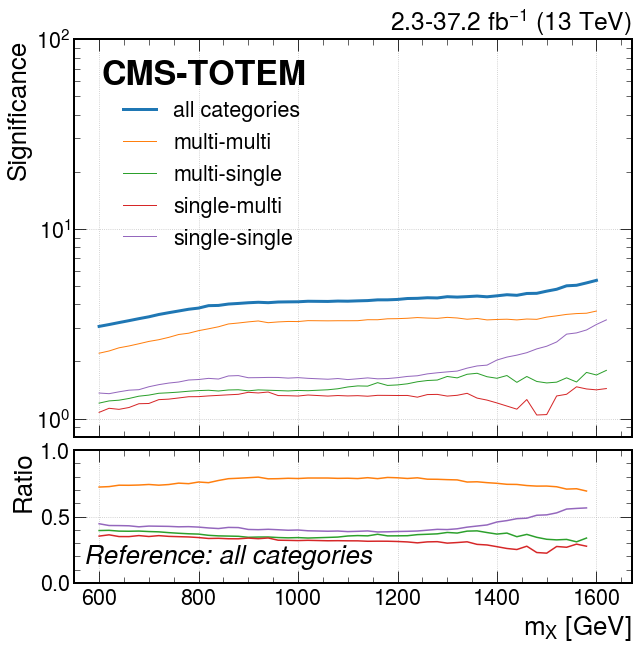

In [9]:
for chList,anaList,customAnaTitles,ylim,ylim_ratio,ylim_ratiopval, outpname in [ 
   (['z'],             
    ['inc_xangle_nvtx_expfinal','inc_xangle_expfinal','inc_nvtx_expfinal','inc_expfinal'],         
    ['vtx+angle','angle only','vtx only','inclusive'],
    (1e-2,5), (0.5,1.5), (0.,2.),  os.path.join(_outDir,'fallbackcombvspu')),
   (['z','zee','zmm'], 
     ['inc_xangle_nvtx_expfinal'],
     ['vtx+angle','vtx+angle','vtx+angle'],
     (1e-2,5), (0.5,1.5), (0.,2.),   os.path.join(_outDir,'zvszll')),
   (['z'],          
    ['inc_xangle_nvtx_expfinal'] + ['pcat{}_xangle_nvtx_expfinal'.format(i) for i in range(1,5)],  
    ['all categories','multi-multi','multi-single','single-multi','single-single'],
    (1e-2,5), (0.5,5), (0.,1.),   os.path.join(_outDir,'vsrec')), 
  # (['z'],          
  #   ['inc_xangle_nvtx_expfix'] + ['pcat{}_xangle_nvtx_expfix'.format(i) for i in range(1,5)],  
  #   ['all categories','multi-multi','multi-single','single-multi','single-single'],
  #  (1e-1,10), (0.8,4), (0.5,1.2),   os.path.join(_outDir,'vsrecfix')), 
   # (['z'], 
   #  ['inc_xangle_nvtx_expfix','inc_xangle_nvtx_expfinal',],
   #  ['Unblinded','Updated'],
   #  (1e-2,5), (0.,1.5), (0.,2.),   os.path.join(_outDir,'zunbvsup')),
   # (['g'], 
   #  ['inc_xangle_nvtx_expfix','inc_xangle_nvtx_expfinal',],
   #  ['Unblinded','Updated'],
   #  (1e-1,50), (0.,20.), (0.,2.),   os.path.join(_outDir,'gunbvsup')),
    #(['z'],             
    # ['inc_exc','inc_inc'],
    # ['=1 px only','=1,2 px'],
    # (1e-2,5), (0.8,1.2), (0.5,1.2),   os.path.join(_outDir,'incvsexc')),
    #(['z'],   ['inc_xangle_nvtx_exc','inc_xangle_nvtx_Dec2020'],                                                 (1e-2,5), (0.8,1.2), (0,0.1),   os.path.join(_outDir,'vsdec2020')),
    #(['z'],   ['inc_xangle_nvtx_exc','inc_xangle_nvtx_preapp'],                                                 (1e-2,5), (0.8,1.2), (0.8,1.2),   os.path.join(_outDir,'vsdecpreapp')),
    #(['z'],   ['inc_xangle_nvtx_exc','inc_xangle_nvtx_expunb'],                                                 (1e-2,5), (0.8,1.2), (0.8,1.2),   os.path.join(_outDir,'vsunb')),
    #(['z'],   ['inc_xangle_nvtx_expunb','inc_xangle_nvtx_expfix'],    ['OLD (all)','NEW (all)'],   (1e-1,10), (0.9,1.0), (0.9,1.0),   os.path.join(_outDir,'vsfix')),
    #(['z'],   ['inc_xangle_nvtx_obsunbv2','inc_nvtx_obsunbv2','inc_xangle_obsunbv2'],    ['all categories',r'only $N_{vtx}$ categs',r'only cross. angle categs'],   (1e-1,1), (0.8,1.2), (0.5,1.2),   os.path.join(_outDir,'vscategs')),
    #(['z'],   ['inc_xangle_nvtx_obsunbv2','inc_xangle_nvtx_part_corr_obsunbv2','inc_xangle_nvtx_corr_obsunbv2'],  ['uncorrelated','part. correlated','fully correlated'],     (1e-2,1), (0.8,1.2), (0.8,1.2),   os.path.join(_outDir,'vscorr')),
    #(['z'],   ['inc_xangle_nvtx_exc','pcat1_xangle_nvtx_exc','pcat2_xangle_nvtx_exc','pcat3_xangle_nvtx_exc','pcat4_xangle_exc'],    (0.1,10),   (0,4),    (0,1.), os.path.join(_outDir,'mmvsfallback')),
    #(['z'],   ['inc_xangle_nvtx_exc','inc_xangle_jveto_exc'],                                                    (1e-2,5), (0.25,2),    (1,2.5),   os.path.join(_outDir,'incvscep')),  
    ]:
    compare(df,chList=chList,anaList=anaList,customAnaTitles=customAnaTitles,ylim=ylim,ylim_ratio=ylim_ratio,         outpname=outpname)
    compare(df,chList=chList,anaList=anaList,customAnaTitles=customAnaTitles,ylim_ratio=ylim_ratiopval,doLimits=False,outpname=outpname+'_pval')
    
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

## Show expected limits / p-vals

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['proc', 'x', 'r95', 'ci68', 'ci95'], dtype='object')]

  pytables.to_hdf(


800 [0.05224609]
1000 [0.04931641]
1400 [0.04296875]


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['proc', 'x', 'r95', 'ci68', 'ci95'], dtype='object')]

  pytables.to_hdf(


800 [0.07666016]
1000 [0.07080078]
1400 [0.06298828]


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['proc', 'x', 'r95', 'ci68', 'ci95'], dtype='object')]

  pytables.to_hdf(


800 [0.07080078]
1000 [0.06689453]
1400 [0.05908203]


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['proc', 'x', 'r95', 'ci68', 'ci95'], dtype='object')]

  pytables.to_hdf(


800 [0.91015625]
1000 [0.83984375]
1400 [0.77734375]


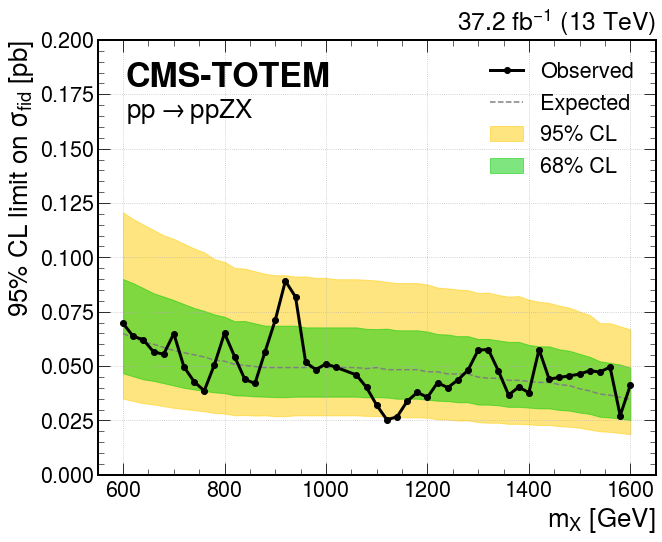

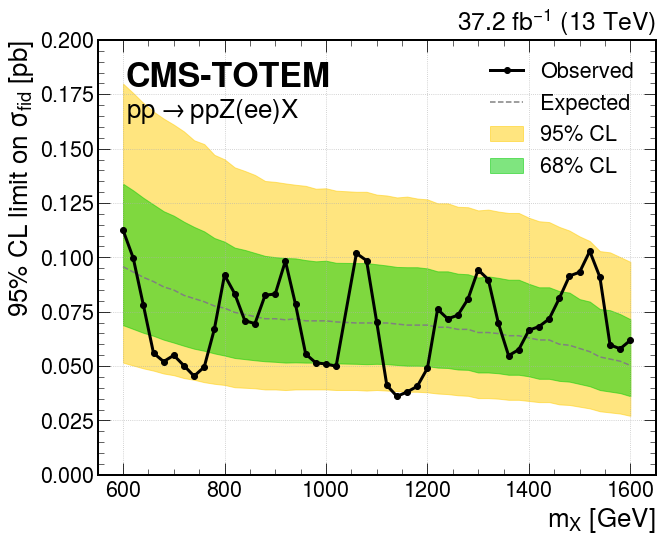

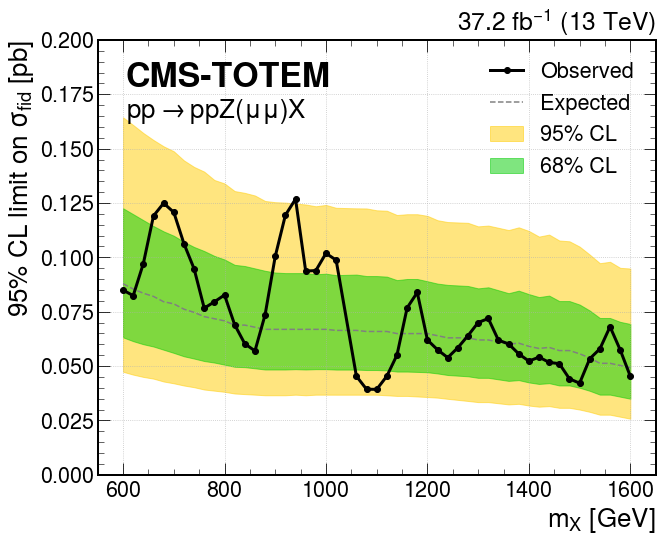

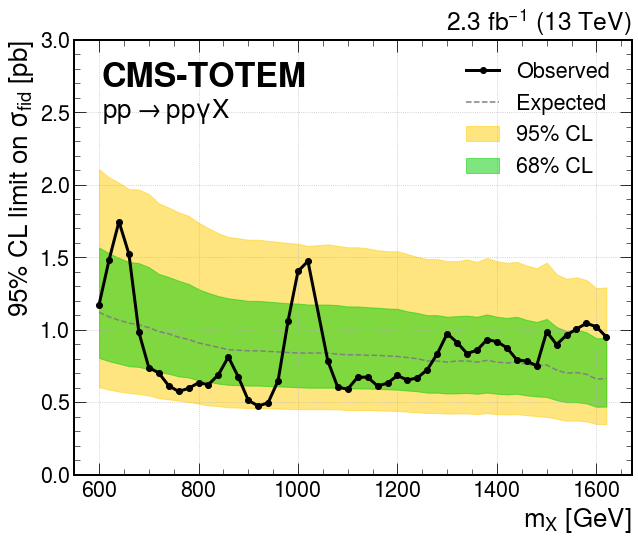

In [7]:
for ana,obsAna,channel,logy,outpname in [
   #('pcat1_xangle_nvtx_expfinal','pcat1_xangle_nvtx_obsunbfinal', 'zmm', False, os.path.join(_outDir,'obs_zmmlim_mm')),
   ('inc_xangle_nvtx_expfinal','inc_xangle_nvtx_obsunbfinal', 'z',   False, os.path.join(_outDir,'obs_zlim')),
   ('inc_xangle_nvtx_expfinal','inc_xangle_nvtx_obsunbfinal', 'zee', False, os.path.join(_outDir,'obs_zeelim')),
   ('inc_xangle_nvtx_expfinal','inc_xangle_nvtx_obsunbfinal', 'zmm', False, os.path.join(_outDir,'obs_zmmlim')),
   ('inc_xangle_nvtx_expfinal','inc_xangle_nvtx_obsunbfinal', 'g',   False, os.path.join(_outDir,'obs_glim')),
       
   #('inc_xangle_jveto_expfinal','inc_xangle_jveto_obsunbfinal','z',False,os.path.join(_outDir,'obs_exczlim')),
   #('inc_xangle_jveto_expfinal','inc_xangle_jveto_obsunbfinal','zee',False,os.path.join(_outDir,'obs_exczeelim')),
   #('inc_xangle_jveto_expfinal','inc_xangle_jveto_obsunbfinal','zmm',False,os.path.join(_outDir,'obs_exczmmlim')),
   #('inc_xangle_jveto_expfinal','inc_xangle_jveto_obsunbfinal','g',False,os.path.join(_outDir,'obs_excglim')),
    ]:
    showLimits(df,ana=ana,obsAna=obsAna,channel=channel,logy=logy,outpname=outpname)

#showPval(df,ana='inc_xangle_nvtx_obsunbfinal',    channelList=['z','zmm','zee','g'],captionTitle='', outpname=os.path.join(_outDir,'obs_localsig'))
#showPval(df,ana='inc_xangle_jveto_obsunbfinal',    channelList=['z','zmm','zee','g'],captionTitle='',outpname=os.path.join(_outDir,'obs_localsig_exc'))

In [ ]:
for tag in ['PPzX','PPgX']:
    nuisances=pd.read_hdf('/eos/user/p/psilva/www/EXO-19-009/stat/2022Feb09/nuisances{}.h5'.format(tag),
                          key='nuisances')
    
    fig,ax=plt.subplots(figsize=(8,8))
    
    for group,data in nuisances.groupby('title'):
        h=plt.hist(data['val'],label=group,bins=np.linspace(-2,2,10),histtype='step',linewidth=2,fill=None)
    plt.xlabel('Post-fit nuisance value')
    plt.ylabel('Counts')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    hep.cms.text(exp='CMS-TOTEM',loc=1)
    for ext in ['png','pdf']:
        plt.savefig(os.path.join(_outDir,'postfitnuisance_val_dist{}.{}'.format(tag,ext)))
    plt.close()
    
    for group,data in nuisances.groupby('title'):
        plt.hist(0.5*(data['ehi']-data['elo']),label=group,bins=np.linspace(0,2,20),histtype='step',linewidth=2)
    plt.xlabel('Post-fit nuisance uncertainty')
    plt.ylabel('Counts')
    plt.grid()
    plt.legend()
    hep.cms.text(exp='CMS-TOTEM',loc=1)
    plt.tight_layout()
    for ext in ['png','pdf']:
        plt.savefig(os.path.join(_outDir,'postfitnuisance_sigma_dist{}.{}'.format(tag,ext)))
    plt.close()